In [2]:
import numpy as np
import pandas as pd

In [3]:
cols = ['word_freq_make','word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
         'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
         'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
         'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
         'word_freq_table','word_freq_conference','char_freq_; ','char_freq_( ','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
        'capital_run_length_average','capital_run_length_longest','capital_run_length_total', 'spam']
df = pd.read_csv('spambase.data', names=cols)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df.loc[:,df.columns != 'spam']
target = df.loc[:, 'spam']
# Split into training/testing
# The following will split as 75% training 25% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3000)
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_train

3941    0
2095    0
54      1
1852    0
3560    0
       ..
1876    0
949     1
1966    0
3841    0
1016    1
Name: spam, Length: 3450, dtype: int64

In [5]:
# format a number based on its magnitude
# If <= 100000, print using :.3f
# Else print using :.0e
def format_nbr(f):
    if abs(f) < 100000:
        return f'{f:.3f}'
    else:
        return f'{f:.4e}'

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

def run_model(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    err_train = 1-acc_train
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    err_test = 1-acc_test

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)

    print(f'   training accuracy = {format_nbr(acc_train)}')
    print(f'   testing accuracy = {format_nbr(acc_test)}')
    print(f'   training error = {format_nbr(err_train)}')
    print(f'   testing error = {format_nbr(err_test)}')
    print(f'   train f1 = {format_nbr(f1_train)}')
    print(f'   test f1 = {format_nbr(f1_test)}')
    print(f'   train AUC = {format_nbr(train_auc)}')
    print(f'   test AUC = {format_nbr(test_auc)}')

In [7]:
#1a train test accuracy, f1, auc
model = DecisionTreeClassifier(criterion="entropy")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.911
   training error = 0.001
   testing error = 0.089
   train f1 = 0.999
   test f1 = 0.890
   train AUC = 1.000
   test AUC = 0.912


In [8]:
#1b add gini index
model = DecisionTreeClassifier(criterion="gini")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.910
   training error = 0.001
   testing error = 0.090
   train f1 = 0.999
   test f1 = 0.886
   train AUC = 1.000
   test AUC = 0.908


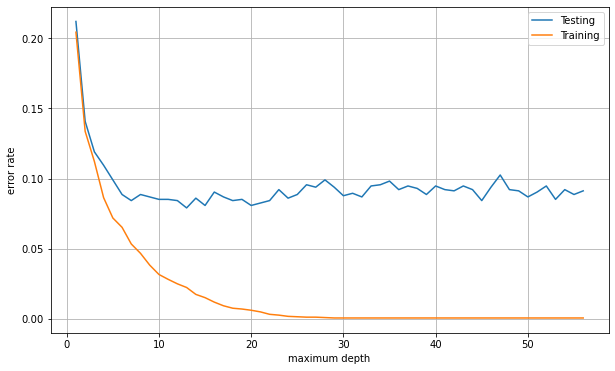

[0.21198957428323195,
 0.1407471763683753,
 0.11902693310165069,
 0.1094700260642919,
 0.09904430929626407,
 0.08861859252823634,
 0.08427454387489142,
 0.08861859252823634,
 0.08688097306689835,
 0.08514335360556036,
 0.08514335360556036,
 0.08427454387489142,
 0.07906168549087744,
 0.08601216333622941,
 0.08079930495221543,
 0.09035621198957433,
 0.08688097306689835,
 0.08427454387489142,
 0.08514335360556036,
 0.08079930495221543,
 0.08253692441355343,
 0.08427454387489142,
 0.09209383145091221,
 0.08601216333622941,
 0.08861859252823634,
 0.0955690703735882,
 0.0938314509122502,
 0.09904430929626407,
 0.0938314509122502,
 0.08774978279756729,
 0.08948740225890528,
 0.08688097306689835,
 0.09470026064291925,
 0.0955690703735882,
 0.09817549956559513,
 0.09209383145091221,
 0.09470026064291925,
 0.09296264118158126,
 0.08861859252823634,
 0.09470026064291925,
 0.09209383145091221,
 0.09122502172024327,
 0.09470026064291925,
 0.09209383145091221,
 0.08427454387489142,
 0.0938314509122

In [9]:
import matplotlib.pyplot as plt
#1c max depth

depth_col = []
train_errs = []
test_errs = []
for k in range(1, 57, 1):
    result = DecisionTreeClassifier(max_depth = k)
    result.fit(x_train, y_train)
    y_train_predicted = result.predict(x_train)
    y_test_predicted = result.predict(x_test)
    acc_train = result.score(x_train, y_train)
    err_train = 1-acc_train
    acc_test = result.score(x_test, y_test)
    err_test = 1-acc_test
    depth_col.append(k)
    train_errs.append(err_train)
    test_errs.append(err_test)
    
plt.figure(figsize = (10,6))
plt.grid(True)
plt.plot(depth_col, test_errs, label='Testing')
plt.plot(depth_col, train_errs, label='Training')
plt.legend(loc="upper right")
plt.xlabel('maximum depth')
plt.ylabel('error rate')
plt.show()
test_errs

In [10]:
from sklearn.ensemble import RandomForestClassifier
#2a random forest

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = RandomForestClassifier(n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)

,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.994203,0.940052,0.992625,0.922034,0.999952,0.979749
1,50,0.999420,0.958297,0.999267,0.946309,0.999998,0.988929
2,100,0.999420,0.954822,0.999267,0.941834,0.999999,0.988598
3,500,0.999420,0.958297,0.999266,0.946429,0.999999,0.989311


word_freq_table               0.000143
word_freq_parts               0.000363
word_freq_415                 0.000696
word_freq_857                 0.000857
word_freq_3d                  0.000881
word_freq_addresses           0.000958
word_freq_conference          0.001208
word_freq_original            0.001432
word_freq_direct              0.001469
word_freq_cs                  0.001546
word_freq_telnet              0.002016
word_freq_project             0.002214
word_freq_report              0.002285
char_freq_[                   0.002473
word_freq_font                0.002485
word_freq_lab                 0.002886
word_freq_data                0.003061
word_freq_people              0.003200
char_freq_#                   0.003205
word_freq_85                  0.003524
word_freq_pm                  0.003539
word_freq_technology          0.003550
word_freq_make                0.004059
word_freq_order               0.004706
word_freq_credit              0.004743
word_freq_labs           

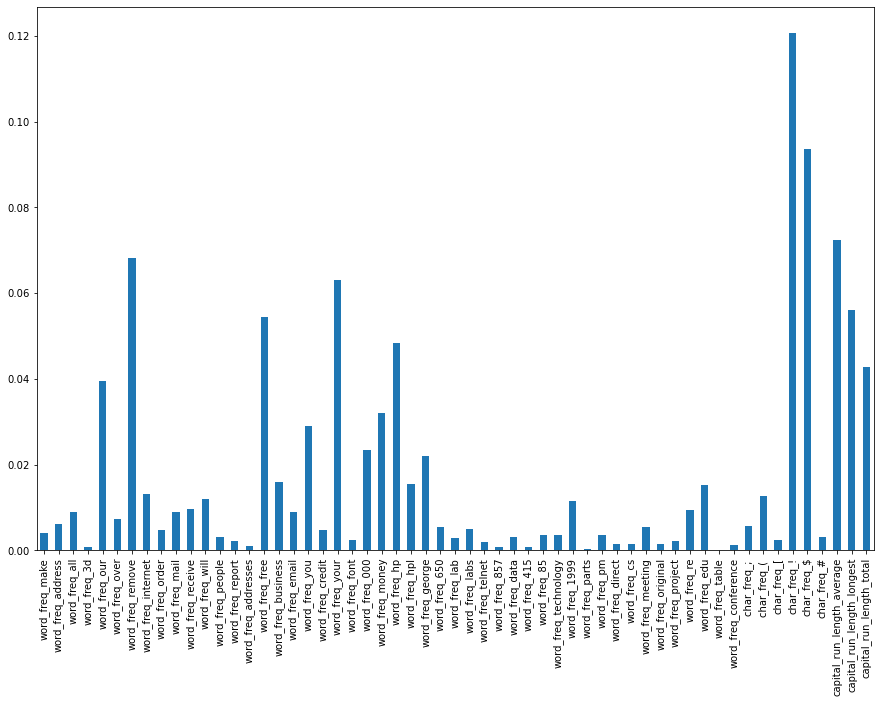

In [11]:
#2c variable of importance
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=cols[:-1])

print(forest_importances.sort_values())

plt.figure(figsize = (15,10))
forest_importances.plot.bar()
plt.show()

In [12]:
from sklearn.ensemble import AdaBoostClassifier
#3a AdaBoost

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = AdaBoostClassifier(n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)



,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.926377,0.930495,0.906823,0.911308,0.973346,0.973520
1,50,0.950435,0.941790,0.937477,0.925967,0.990297,0.979121
2,100,0.959710,0.934839,0.948878,0.917492,0.994799,0.975834
3,500,0.992754,0.931364,0.990812,0.912320,0.999749,0.973255


Decision Tree


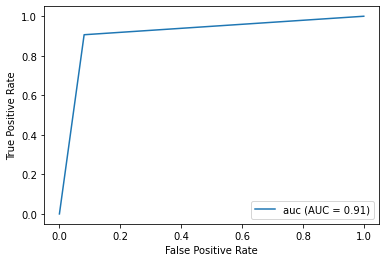

Random Forest


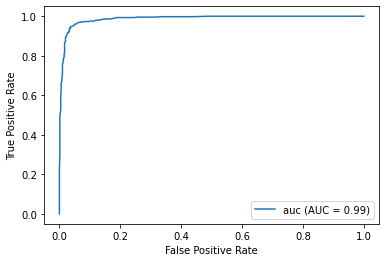

AdaBoost


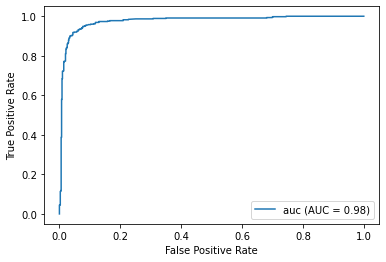

In [13]:
#3c roc curves 
def plot_roc(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    probs = model.predict_proba(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
    auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='auc')
    display.plot()
    plt.show()
    
estimators = {'Decision Tree': DecisionTreeClassifier(),
             'Random Forest': RandomForestClassifier(n_estimators = 100),
             'AdaBoost' : AdaBoostClassifier(n_estimators = 100)}
for name, model in estimators.items():
    print (name)
    plot_roc(model)

In [14]:
mushroom_cols = ['class','cap_shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size'
                , 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring'
                , 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', ' habitat']
df_shroom = pd.read_csv('agaricus-lepiota.data', names=mushroom_cols)
df_shroom

,class,cap_shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
features = df_shroom.loc[:,df_shroom.columns != 'class']
target = df_shroom.loc[:, 'class']
# Split into training/testing
# The following will split as 75% training 25% testing
x_train_shroom, x_test_shroom, y_train_shroom, y_test_shroom = train_test_split(features, target, test_size=0.25, random_state=3000)
y_train_shroom

5122    e
4903    p
5145    p
3722    e
3587    e
       ..
1966    e
3841    e
1016    e
7731    p
7676    p
Name: class, Length: 6093, dtype: object

In [16]:
import math
from scipy.special import logsumexp

#4a naive bayes
class NaiveBayes:
    def __init__(self):
        self.probs = []
    
    def priors(self, y):
        self.classes = np.unique(y)
        self.priors = {}
        for class_id in self.classes:
            self.priors[class_id] = sum(y == class_id) / y.shape[0]
        return self.priors

    def fit(self, x, y):
        self.priors(y)
        self.probs = {}
        for y_k in self.classes:
            x_k = x[y == y_k]  # training samples where y == y_k
            for feature in x_k: 
                values = np.unique(x[feature]) 
                values_count = len(x_k[feature]) 
                for v in values:
                    c_v = sum(x_k[feature] == v)
                    prob = (c_v + 1) / (values_count + len(values))
                    key = feature + '=' + v + '|Y=' + y_k # key for dictionary
                    self.probs[key] = prob
    
    def predict(self, x):
        result = []
        log_proba = self.predict_log_proba(x)
        # Pick the class that has the highest log probability
        for probs in log_proba:
            result.append(self.classes[np.argmax(probs)])
        return result
    
    # Predict log probabilities
    def predict_log_proba(self, x):
        log_proba = []  
        features = x.columns
        for i, row in x.iterrows():
            p = []  
            for y_k in self.classes: 
                score = math.log(self.priors[y_k])
                for ftr in features:  # iterate over columns
                    key = ftr + '=' + row[ftr] + '|Y=' + y_k #P(X_j = x_j | Y=k)
                    score += math.log(self.probs[key])
                p.append(score)
            p -= logsumexp(p)
            log_proba.append(p)
        return log_proba
    
    # Predict probabilities
    def predict_proba(self, x):
        return np.exp(self.predict_log_proba(x))


In [17]:
#4a) Train classifier
clf_nb = NaiveBayes()
clf_nb.fit(x_train_shroom, y_train_shroom)
clf_nb.probs

{'cap_shape=b|Y=e': 0.09625,
 'cap_shape=c|Y=e': 0.0003125,
 'cap_shape=f|Y=e': 0.3740625,
 'cap_shape=k|Y=e': 0.0553125,
 'cap_shape=s|Y=e': 0.0071875,
 'cap_shape=x|Y=e': 0.466875,
 'cap-surface=f|Y=e': 0.36616635397123204,
 'cap-surface=g|Y=e': 0.00031269543464665416,
 'cap-surface=s|Y=e': 0.2701688555347092,
 'cap-surface=y|Y=e': 0.36335209505941213,
 'cap-color=b|Y=e': 0.012172284644194757,
 'cap-color=c|Y=e': 0.008114856429463172,
 'cap-color=e|Y=e': 0.15293383270911362,
 'cap-color=g|Y=e': 0.2443820224719101,
 'cap-color=n|Y=e': 0.30181023720349565,
 'cap-color=p|Y=e': 0.012172284644194757,
 'cap-color=r|Y=e': 0.004057428214731586,
 'cap-color=u|Y=e': 0.003433208489388265,
 'cap-color=w|Y=e': 0.1647940074906367,
 'cap-color=y|Y=e': 0.09612983770287141,
 'bruises?=f|Y=e': 0.3351063829787234,
 'bruises?=t|Y=e': 0.6648936170212766,
 'odor=a|Y=e': 0.09428660630658757,
 'odor=c|Y=e': 0.00031220730565095225,
 'odor=f|Y=e': 0.00031220730565095225,
 'odor=l|Y=e': 0.09990633780830471,
 '

In [18]:
#4b predict probability
clf_nb.predict_proba(x_test_shroom)

array([[1.00000000e+00, 1.92466684e-11],
       [9.99982168e-01, 1.78323635e-05],
       [8.20674249e-11, 1.00000000e+00],
       ...,
       [2.15757932e-01, 7.84242068e-01],
       [8.33343601e-01, 1.66656399e-01],
       [9.99999931e-01, 6.86837720e-08]])

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
#4c Metrics
def nb_metrics(clf, x, y, title):
    data = []
    y_pred = clf.predict(x)
    accuracy = accuracy_score(y, y_pred)
    data.append(accuracy)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    precision = TP / (TP + FP)
    data.append(precision)
    recall = TP / (TP + FN)
    data.append(recall)
    F1 = 2 * (precision * recall) / (precision + recall)
    data.append(precision)
    #print(f'Precision: {precision}')
    #print(f'Recall: {recall}')
    #print(f'F1: {F1}')
    
    df = pd.DataFrame({title: data}, index=['Accuracy', 'Precision', 'Recall', 'F1'])
    display(df)
    
# Display Naive Bayes classifer metrics for home-grown version
nb_metrics(clf_nb, x_test_shroom, y_test_shroom, "Naive Bayes")

,Naive Bayes
Accuracy,0.947809
Precision,0.993499
Recall,0.901672
F1,0.993499


In [20]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

In [21]:
#4d use package NB
enc = OrdinalEncoder()
clf_nb_package = CategoricalNB()
clf_nb_package.fit(enc.fit_transform(x_train_shroom), y_train_shroom)
nb_metrics(clf_nb_package, enc.transform(x_test_shroom), y_test_shroom, "Naive Bayes Package")

,Naive Bayes Package
Accuracy,0.947809
Precision,0.993499
Recall,0.901672
F1,0.993499
